Inizializzare il seed del metodo random di python

In [4]:
import random
seed = 7
random.seed(seed)
x= random.random()
print(x)


0.32383276483316237


Osservazione 1

e normale ottenere sempre lo stresso numero, per ottenere una distribuzione casuale tra 0 e 1 e meglio avere una lista di float e usare seed per costuire una lista di numeri casusali

In [5]:
"generazione di un numero pseudo-casualee distribuito fra xMin e xMax"
"il seed della random e inizializzato con l'orario del sistema su cui viene runnato"

def rand_range (xMin,xMax):
    return xMin + random.random() * (xMax-xMin)

<H1> Algoritmo Try and Catch</H1>

In [6]:
def rand_TAC (f,xMin,xMax,yMax):
    x = rand_range(xMin,xMax)
    y = rand_range(0,yMax)
    while (y>f(x)):
        x = rand_range(xMin,xMax)
        y = rand_range(0,yMax)
    
    return x

Per la funzione f(x) che definisce la pdf e sufficiente che sia esprimibile come algoritmo e non necessariamente abbia una forma funzionale.
Contro e poco efficiente: generare due numeri casuali di cui molti vengono scartati inoltre e necessario conoscere il massimo della variabile y.

<H1>Metodo della CDF (Cumulative Distribution Function)</H1>

<p>Generare eventi pseudo casuali con distribuzione uniniforme in y e equivalente a genenrarli per eventi x con distribuzione f(x)

Vantaggi : E efficiente non ci sono sprechi di numeri 
Svantaggi : Serve conoscere la forma analitica della pdf e della cdf e la sua inversa 
            Calcolo della funzione aggiunge tempo di esecuzione
</p>

<H3> Exercise 4.1 </H3>
Write a function that implements the linear congruential generator for pseudo-random numbers, using these parameters:

M = 2147483647
A = 214013
C = 2531011

In [7]:
def lcg(x0, N):
    M = 2147483647
    A = 214013
    C = 2531011
    randlist = [x0]
    count = 0
    for i in range(0,N):
        x = (A*randlist[i] + C) % M
        randlist.append(x)
    return randlist

def main():
    N = 10
    x0 = 14
    rand = lcg(x0,N)
    print(rand)
    

    return 


if __name__ == '__main__':
    main()

[14, 5527193, 1777680670, 720340848, 899866846, 1167348343, 213387725, 1509967981, 1588331851, 627959091, 1884843934]


<H3> Exercise 4.3 </H3>
<p> Si mostri che inizializzare il seed di un generatore di numeri pseudo-casuali interi
equivale ad inserirsi in una sequenza di numeri pseudo-casuali ad un qualunque punto. </p>

In [8]:
import random
    
N = 2
randlist = []
randstates = []

for i in range (N):
    #generiamo N numeri casuali interi compresi tra 0 e 100
    randlist.append (random.randint(0,100))
    #The random.getstate() method in Python returns an object representing the current state of the random number generator. 
    #This state includes internal information about the generator’s sequence of random values. You can use this method to capture the state and later restore it 
    #using the random.setstate() method.
    randstates.append(random.getstate())
    print(i,randlist[-1])
    


random.setstate(randstates[0]) # la disribuzione riparte alla posizione n+1 risppetto a quella in randlist 
print(random.randint(0,100),randlist[1])

# Notare che se usiamo un elemento di randlist come seed la sequenza non riparte da tale vallore, ma il numero viene usato per crearne una nuova
random.seed(randlist[0])
print(random.randint(0,100), randlist[1])

0 19
1 50
50 50
86 50


<H3> Exercise 4.4 </H3>

<p> Implement a pseudo-random number generator according to a uniform distribution between two arbitrary endpoints.

Use the matplotlib library to visualize the distribution of the generated numbers. </p>

[0.6229016948897019, 0.7417869892607294, 0.7951935655656966, 0.9424502837770503, 0.7398985747399307, 0.922324996665417, 0.029005228283614737, 0.46562265437810535, 0.9433567169983137, 0.6489745531369242, 0.9009004917506227, 0.11320596465314436, 0.46906904778216374, 0.24657283261983032, 0.5437608592359304, 0.5739411879281008, 0.013114189588902203, 0.21672980046384815, 0.2794823660111103, 0.9163453718085519, 0.7657254516291417, 0.15960421235803823, 0.7971469914312045, 0.13876741839890316, 0.6174525204661166, 0.1266992325502697, 0.0017748622025346439, 0.8714047447242821, 0.2094563824951179, 0.21548116922473226, 0.9824211088259253, 0.8724077654368019, 0.2893051677469265, 0.9614779889500835, 0.5392234688708106, 0.6778304772505923, 0.20477951453379284, 0.9409760010879991, 0.6906419411069082, 0.9665643123171954, 0.8937416775764785, 0.29878889785386775, 0.36118993472238414, 0.1659560571297456, 0.14570190954068252, 0.06513971337567626, 0.3013591007694625, 0.6031099974076544, 0.003383119374356758

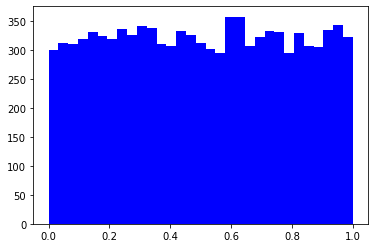

In [17]:
import random
import matplotlib.pyplot as plt 
import numpy as np
from math import ceil


# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

#This function generates N random numbers from a seed in an interval (xMin,xMax). The numbers follows a  uniform distribution

def generate_range(xMin, xMax,N,seed = 0.):
     
     if seed != 0. : random.seed (float (seed)) #if seed is not a float number make a cast on it
     randlist = []
     #Generation of N random float numbers with values between xMin and xMax

     for i in range(0,N):
        randlist.append(xMin + random.random() * (xMax-xMin))
    
     return randlist

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

#This function calculate the optimal numbers of bins for making an in Histogram un function of the number of 
#events

def sturges(N_events):
    if len(N_events) != 1 :
        return ceil(1+3.322 * np.log(len(N_events)))
    else:
        return ceil(1+3.322 * np.log(N_events))

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

def main():

    xMin = 0;
    xMax = 1;
    
#generate N random float numbers with a setted seed in an closed interval
    x = generate_range (xMin,xMax,10000,5)
    print(x)

#Bulding the optimal number of bins using Sturges Formula
    N_Bins = sturges(x)
    
#Make the edges for the bins
    bin_edges = np.linspace(xMin,xMax,N_Bins)
    print(bin_edges)
#Plotting the distribution
    plt.hist(x, bins = bin_edges, color = 'blue')



if __name__ == '__main__':
    main()


<H3> Exercise 4.5 </H3>
<p>Implement a pseudo-random number generator that uses the try-and-catch method to generate pseudo-random numbers according to an arbitrary probability distribution.

Take the probability density function (pdf) as an input parameter for generating random numbers.

Use the matplotlib library to visualize the distribution of the generated numbers. </p>

[1, 3, 0, 3, 0, 3, 2, 1, 0, 0, 2, 2, 0, 3, 0, 0, 2, 4, 1, 1, 0, 5, 1, 1, 2, 1, 3, 0, 0, 0, 0, 6, 0, 0, 3, 2, 1, 1, 0, 0, 0, 3, 3, 2, 2, 5, 7, 1, 3, 0, 3, 0, 1, 1, 3, 1, 2, 0, 6, 1, 0, 2, 0, 5, 1, 0, 1, 3, 0, 2, 0, 1, 2, 1, 3, 2, 0, 0, 1, 3, 1, 2, 4, 0, 0, 3, 3, 0, 3, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 4, 0, 4, 7, 0, 6, 2, 0, 0, 1, 0, 0, 0, 6, 0, 1, 0, 1, 3, 2, 3, 0, 0, 1, 1, 0, 8, 8, 2, 2, 0, 1, 0, 3, 0, 0, 2, 1, 3, 1, 0, 0, 2, 0, 1, 2, 0, 1, 4, 2, 9, 0, 0, 2, 1, 1, 3, 1, 0, 0, 1, 0, 0, 3, 1, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 7, 0, 2, 0, 0, 0, 1, 0, 5, 2, 1, 0, 2, 1, 3, 1, 5, 1, 2, 0, 0, 1, 1, 1, 0, 4, 0, 0, 1, 0, 7, 3, 0, 13, 2, 1, 1, 5, 0, 0, 2, 7, 0, 2, 5, 0, 0, 1, 0, 1, 5, 0, 0, 8, 0, 0, 4, 0, 0, 3, 2, 2, 8, 0, 2, 0, 1, 3, 0, 1, 2, 2, 2, 2, 1, 1, 6, 3, 3, 3, 0, 0, 3, 0, 0, 0, 0, 0, 4, 6, 1, 2, 1, 2, 0, 1, 1, 3, 3, 3, 1, 0, 5, 0, 0, 1, 4, 0, 1, 0, 5, 0, 0, 0, 1, 0, 3, 1, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 1, 1, 1, 2, 0, 0, 0, 1, 0, 2, 3, 3, 0, 0, 3, 0, 3, 0, 6, 3, 2, 1, 2, 11, 4, 0

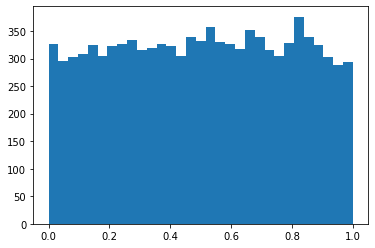

In [12]:
import random
import matplotlib.pyplot as plt 
import numpy as np
from math import ceil
from math import pi
from math import exp
from math import floor


# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

#This function calculate the optimal numbers of bins for making an in Histogram un function of the number of 
#events

def sturges(N_events):
    if len(N_events) != 1 :
        return ceil(1+3.322 * np.log(len(N_events)))
    else:
        return ceil(1+3.322 * np.log(N_events))

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
    
#Generate a pseudo random number x that follows a pdf f. The method use the Try and Catch Algorithm

def rand_TAC (f,xMin,xMax,yMax):

    x = rand_range(xMin,xMax)
    y = rand_range(0,yMax)
    counts = 0

    while (y>f(x)):
        
        x = rand_range(xMin,xMax)
        y = rand_range(0,yMax)
        counts += 1

    return x,counts

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# generate a pseudo random number with uniform pdf in an interval [xmin,xmax]

def rand_range (xMin,xMax):
    return xMin + random.random() * (xMax-xMin)

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

#This method generate using the algorithm Try and Catch a distribution of N pseudo-random numbers that follow the pdf f 

def generate_TAC (f,xMin,xMax,yMax,N,seed = .0):
    if seed != .0 : random.seed(float(seed))
    randlist = []
    counts = []

    for i in range (0,N):
        randlist.append(rand_TAC(f,xMin,xMax,yMax)[0])
        counts.append(rand_TAC(f,xMin,xMax,yMax)[1])

    return randlist,counts
    

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

def main():
    
    #Make a test of the algorithm using a Gaussian distribution with variance = 1 and mean = 1/2, we expect to see a uniform distribution of the x number that follows the pdf f
    
    xMin = 0
    xMax = 1
    yMax = 1

    f = lambda x : 1/np.sqrt(2*pi)*exp(-1/2*(x-1/2)**2)

    x = generate_TAC(f,xMin,xMax,yMax,10000,30)[0]
    counts = generate_TAC(f,xMin,xMax,yMax,10000,30)[1]
    x.sort()
    print(counts)
    print(x)
    y = []

    for i in range(0,len(x)):
        y.append(f(x[i]))
    


    #Calculate the optimal numbers of bin using Sturges 

    n_bins = sturges(x)
    #nBins = floor (len (x) / 20.) + 1 

    #calculate the number of bin-edges 

    bin_edges = np.linspace(xMin,xMax,n_bins)

    plt.hist (x,bins = bin_edges)
    #plt.plot(x,y)

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

if __name__ == "__main__":
    main ()


<h3> Exercisse 4.6 </h3>

<p> Implement a pseudo-random number generator that uses the inverse function method to generate events distributed according to an exponential probability distribution. </p>

<H3> Exercise 4.7 </H3>


<p>Implement a pseudo-random number generator that uses the central limit theorem method to generate events distributed according to a Gaussian probability distribution.

How can you obtain a normal distribution, i.e., a Gaussian distribution centered at zero with unit variance?

Visually verify that as the number of events increases, the similarity between the obtained distribution and the Gaussian functional form increases, both graphically and by using the moments of the distributions calculated on the generated event sample. </p>


[2.         2.09677419 2.19354839 2.29032258 2.38709677 2.48387097
 2.58064516 2.67741935 2.77419355 2.87096774 2.96774194 3.06451613
 3.16129032 3.25806452 3.35483871 3.4516129  3.5483871  3.64516129
 3.74193548 3.83870968 3.93548387 4.03225806 4.12903226 4.22580645
 4.32258065 4.41935484 4.51612903 4.61290323 4.70967742 4.80645161
 4.90322581 5.        ]
3.945652584039843


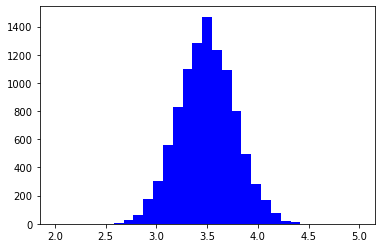

In [27]:
import random
import numpy as np
import matplotlib.pyplot as plt 
from math import ceil
from math import pi
from math import exp
from math import floor



# generate a pseudo random number with uniform pdf in an interval [xmin,xmax]

def rand_range (xMin,xMax):
    return xMin + random.random() * (xMax-xMin)

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# Generate pseduo-random numbers using Cenetral Limit Theorem 

def rand_TCL(xMin,xMax,N_sum = 10):
   
   y = 0.
   for i in range(N_sum):
      y = y + rand_range(xMin,xMax) #every time the function rand_TCL is called rand_range change value and produce a new average of 10 pseudo random numbers that follow a uniform distribution
   z = y/N_sum
   return z
   
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# this function generate N random numbers that follows a Gaussian Distribution when N get bigger 
# it was set N_sum = 10 for making sample set of ten pseudo random numbers to evaluate sample mean 

def generate_TCL(xMin,xMax,N, seed = 0.):

   if seed != 0. : random.seed(float(seed))
   randlist = []
   
   for j in range(N):
      
      randlist.append(rand_TCL(xMin,xMax))

   return randlist 
            
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

#This function calculate the optimal numbers of bins for making an in Histogram un function of the number of 
#events

def sturges(N_events):
    if len(N_events) != 1 :
        return ceil(1+3.322 * np.log(len(N_events)))
    else:
        return ceil(1+3.322 * np.log(N_events))

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -





def main():
    #TCL Sample
   xMin = 2
   xMax = 5
   x = generate_TCL(xMin,xMax,10000)    
   #Bulding the optimal number of bins using Sturges Formula
   N_Bins = sturges(x)
    
#Make the edges for the bins
   bin_edges = np.linspace(xMin,xMax,N_Bins)
   print(bin_edges)
#Plotting the distribution
   plt.hist(x, bins = bin_edges, color = 'blue')

   
 
if __name__ == "__main__" :
   main()
    
    
      

    
    